In [2]:
from models.rlagent import AgentBandit
from models.rlenvironment import Environment
from models.regression import Regression
from sklearn import preprocessing

import numpy as np
import pandas as pd
import torch.nn as nn
import utils.datasets as DB

In [3]:
datasets = DB.Datasets()
datasets.download_UCI()

2023-03-04 11:15:11,886 [INFO] Folder for UCI Mushroom found in the data folder. If the files are corrupted please delete the folder at location ../data/UCI_Mushroom and re-run this command


In [4]:
col_names = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
         'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
         'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
         'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']
mushrooms = pd.read_csv('data/UCI_Mushroom/agaricus-lepiota.data', header=None, names=col_names)

labels = mushrooms.pop(mushrooms.columns[0]).to_numpy()
context = mushrooms.copy()

In [5]:
context.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surf-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Make labels numerical
le = preprocessing.LabelEncoder()
labels_numerical = le.fit_transform(labels)

# Make each feature numerical
for colname in context:
    le = preprocessing.LabelEncoder()
    context[colname] = le.fit_transform(context[colname])
context_numerical = context.to_numpy()
print(context_numerical.shape)

(8124, 22)


In [7]:
agent_args = {
        'model_class'    : Regression, 
        'model_name'     : 'test_rl',
        'input_dim'      : 22+2,
        'output_dim'     : 1,
        'hl_type'        : nn.Linear,
        'hl_units'       : 100,
        'batch_size'     : 64,
        'buffer_size'    : 4096,
        'scheduler'      : None,
        'data_contexts'  : context_numerical,
        'data_labels'    : labels_numerical,
        'training_steps' : 64,
        'n_samples'      : 1,
        'epsilon'        : 0.1,
        'learning_rate'  : 0.001
}

In [8]:
env = Environment(**agent_args)
loss = []

In [9]:
for epoch in range(50000):
    l = env.new_mushroom()
    loss.append(np.float64(l))

C:\Users\vilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:163: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  arr = asanyarray(a)
C:\Users\vilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure the

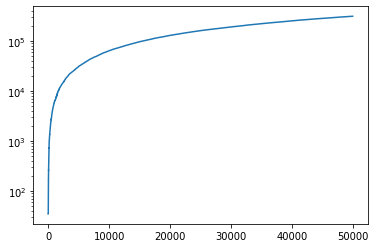

In [10]:
import matplotlib.pyplot as plt
plt.plot(env.cum_regret)
plt.yscale('log')
plt.show()

[0.25063724239080387, 0.2370716632744265, 0.26539214769946257, 0.2570689271472568, 0.25159198107744474, 0.24933431914441748, 0.2461005370963003, 0.25299305971470015, 0.24702745416133381, 0.2511262520491922]


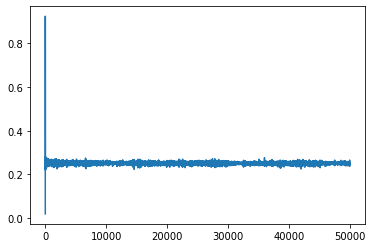

In [11]:
plt.plot(loss)
print(loss[-10:])